### Reinforcement Learning Project 
### Baseline Algorithm implementations compared for a 10x10 with portals and loops
#### 100 X 100 Maze Environment

In [6]:
import gym
import maze_env
import numpy as np
import matplotlib.pyplot as plt

Randomly generated mazes with portals and loops
With loops, it means that there will be more than one possible path. The agent can also teleport from a portal to another portal of the same colour.

- 10 cells x 10 cells: MazeEnvRandom10x10Plus

### 10 X 10 Maze with portals and loops

In [7]:
env = maze_env.MazeEnvRandom10x10Plus(enable_render=False)
NUM_ACTIONS = env.action_space.n  
print("Number of actions: ", NUM_ACTIONS)
STATE_BOUNDS = list(zip(env.observation_space.low, env.observation_space.high))
print("State Bounds:",STATE_BOUNDS)
print("Observation Space: ", env.observation_space)
print("Maze Size: ", env.maze_size)
print("Initial State: ", env.state)

MAZE_SIZE = tuple((env.observation_space.high + np.ones(env.observation_space.shape)).astype(int))
NUM_BUCKETS = MAZE_SIZE 
print("Number of buckets: ", NUM_BUCKETS)

Number of actions:  4
State Bounds: [(0, 9), (0, 9)]
Observation Space:  Box(0, 9, (2,), int64)
Maze Size:  (10, 10)
Initial State:  [0. 0.]
Number of buckets:  (10, 10)


Environment:
- The agent may only choose to go up, down, right, or left ("N", "S", "E", "W"). If the way is blocked, it will remain at the same the location.
- The observation space is the (x, y) coordinate of the agent. The top left cell is (0, 0).
- A reward of 1 is given when the agent reaches the goal. For every step in the maze, the agent recieves a reward of -0.1/(number of cells).
- The maze is reset when the agent reaches the goal.

## Baseline SARSA

Episode 0 - Steps: 161, Reward: 0.8399999999999999, Success: True
Episode 1 - Steps: 529, Reward: 0.47199999999999964, Success: True
Episode 2 - Steps: 275, Reward: 0.7259999999999998, Success: True
Episode 3 - Steps: 27, Reward: 0.974, Success: True
Episode 4 - Steps: 169, Reward: 0.8319999999999999, Success: True
Episode 5 - Steps: 337, Reward: 0.6639999999999997, Success: True
Episode 6 - Steps: 21, Reward: 0.98, Success: True
Episode 7 - Steps: 222, Reward: 0.7789999999999998, Success: True
Episode 8 - Steps: 12, Reward: 0.989, Success: True
Episode 9 - Steps: 8, Reward: 0.993, Success: True
Episode 10 - Steps: 8, Reward: 0.993, Success: True
Episode 11 - Steps: 6, Reward: 0.995, Success: True
Episode 12 - Steps: 6, Reward: 0.995, Success: True
Episode 13 - Steps: 8, Reward: 0.993, Success: True
Episode 14 - Steps: 6, Reward: 0.995, Success: True
Episode 15 - Steps: 6, Reward: 0.995, Success: True
Episode 16 - Steps: 18, Reward: 0.983, Success: True
Episode 17 - Steps: 6, Reward: 0

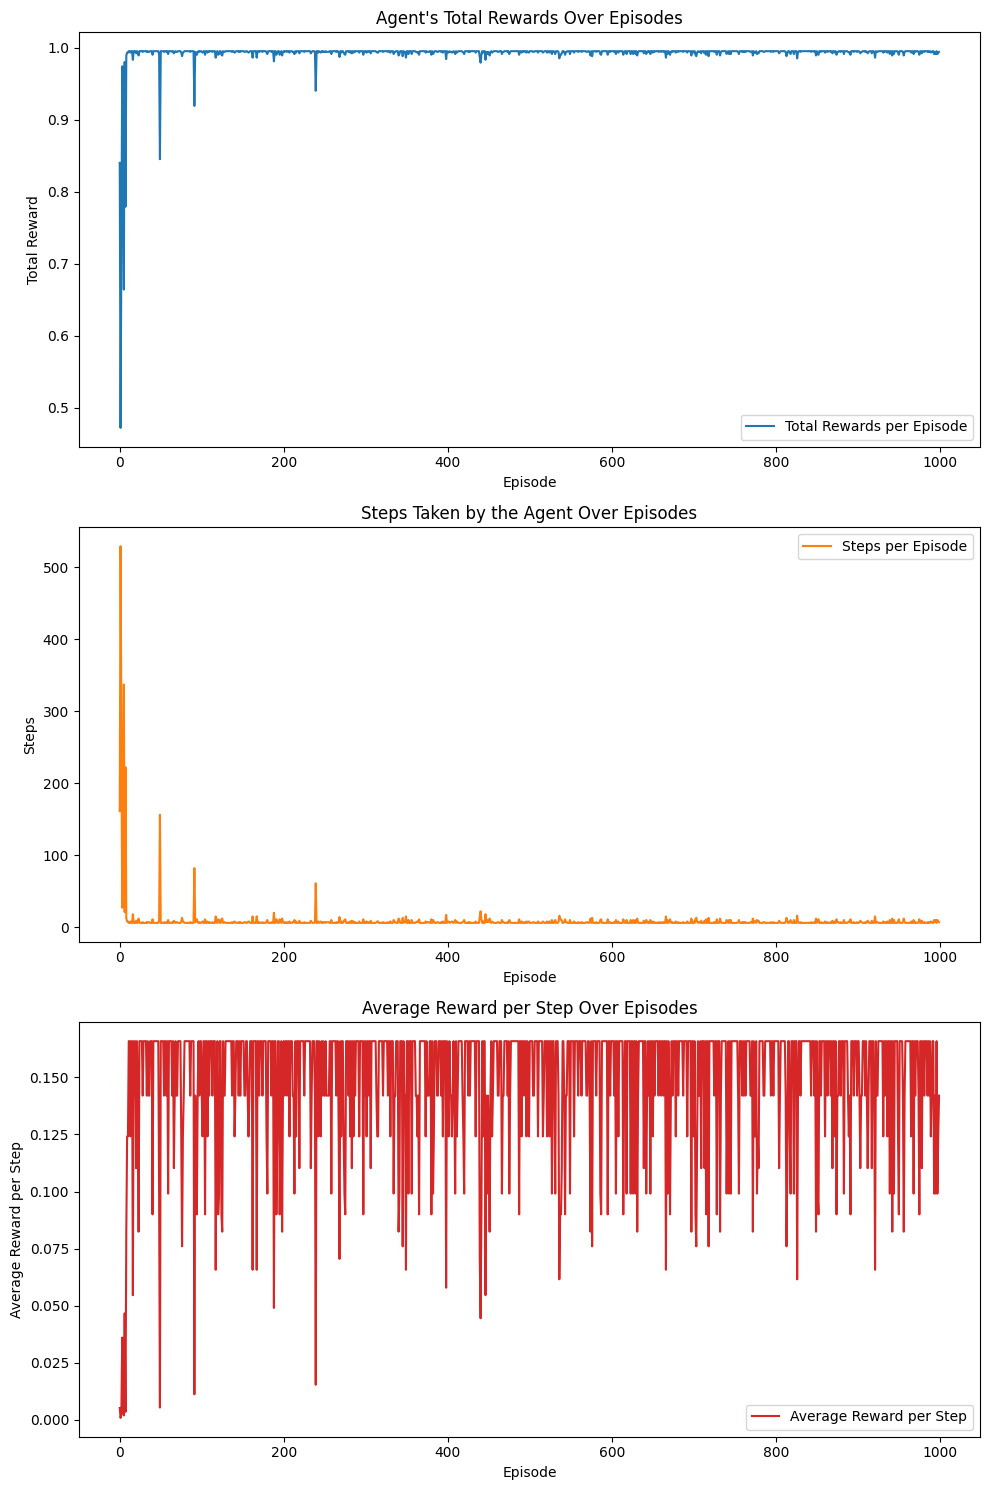

Overall success rate: 1.00


In [8]:
ACTION_MAPPING = {0: "N", 1: "E", 2: "S", 3: "W"}

class SARSA_Agent:
    def __init__(self, action_space_size, state_space_shape, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.q_table = np.zeros(state_space_shape + (action_space_size,))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.action_space_size = action_space_size

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.randint(0, self.action_space_size)
        else:
            action = np.argmax(self.q_table[state])
        return action

    def update(self, state, action, reward, next_state, next_action):
        predict = self.q_table[state + (action,)]
        target = reward + self.gamma * self.q_table[next_state + (next_action,)]
        self.q_table[state + (action,)] += self.alpha * (target - predict)

def run_episode(agent, env, episode):
    state = env.reset()
    state = (int(state[0]), int(state[1]))
    action = agent.choose_action(state)
    total_reward = 0
    steps = 0
    success = False

    while True:
        next_state, reward, done, _ = env.step(ACTION_MAPPING[action])
        next_state = (int(next_state[0]), int(next_state[1]))
        next_action = agent.choose_action(next_state)

        # Update the Q-table within the agent
        agent.update(state, action, reward, next_state, next_action)

        state, action = next_state, next_action
        total_reward += reward
        steps += 1

        if done:
            success = reward == 1  
            print(f"Episode {episode} - Steps: {steps}, Reward: {total_reward}, Success: {success}")
            break

    return total_reward, steps, success


def simulate():
    env = maze_env.MazeEnvRandom10x10Plus(enable_render=False)
    agent = SARSA_Agent(action_space_size=env.action_space.n, state_space_shape=(10, 10))
    
    NUM_EPISODES = 1000
    total_rewards = []
    steps_per_episode = []
    average_rewards_per_step = []  # List to hold the average reward per step for each episode
    success_count = 0

    for episode in range(NUM_EPISODES):
        total_reward, steps, success = run_episode(agent, env, episode)
        total_rewards.append(total_reward)
        steps_per_episode.append(steps)
        average_rewards_per_step.append(total_reward / steps if steps > 0 else 0)  # Avoid division by zero
        success_count += success

    success_rate = success_count / NUM_EPISODES

    fig, axs = plt.subplots(3, 1, figsize=(10, 15))  # Adjust for a new subplot for average rewards per step

    axs[0].plot(total_rewards, label='Total Rewards per Episode')
    axs[0].set_xlabel('Episode')
    axs[0].set_ylabel('Total Reward')
    axs[0].set_title('Agent\'s Total Rewards Over Episodes')
    axs[0].legend()

    axs[1].plot(steps_per_episode, label='Steps per Episode', color='tab:orange')
    axs[1].set_xlabel('Episode')
    axs[1].set_ylabel('Steps')
    axs[1].set_title('Steps Taken by the Agent Over Episodes')
    axs[1].legend()

    axs[2].plot(average_rewards_per_step, label='Average Reward per Step', color='tab:red')
    axs[2].set_xlabel('Episode')
    axs[2].set_ylabel('Average Reward per Step')
    axs[2].set_title('Average Reward per Step Over Episodes')
    axs[2].legend()

    plt.tight_layout()
    plt.show()

    print(f"Overall success rate: {success_rate:.2f}")

if __name__ == "__main__":
    simulate()

-	**Agent's Total Rewards Over Episodes:** The agent consistently acquires high total rewards per episode after an initial learning phase, indicating that it can adapt its policy effectively even in a maze with additional complexities such as portals and loops.
-	**Steps Taken by the Agent Over Episodes:** The agent shows a rapid decrease in the number of steps to complete the maze, which suggests that it quickly learns shortcuts and utilizes portals effectively to reach the goal.
-	**Average Reward per Step Over Episodes:** The average reward per step fluctuates significantly throughout the training episodes. This could be due to the complex nature of the environment where the agent may occasionally take less efficient paths or get caught in loops, affecting its per-step efficiency. 


## Baseline Q-Learning

Episode 0 finished after 1231 steps with total reward = -0.22999999999997534.
Episode 1 finished after 417 steps with total reward = 0.5839999999999996.
Episode 2 finished after 854 steps with total reward = 0.14699999999999935.
Episode 3 finished after 1393 steps with total reward = -0.3919999999999575.
Episode 4 finished after 320 steps with total reward = 0.6809999999999998.
Episode 5 finished after 538 steps with total reward = 0.46299999999999963.
Episode 6 finished after 548 steps with total reward = 0.4529999999999996.
Episode 7 finished after 438 steps with total reward = 0.5629999999999997.
Episode 8 finished after 406 steps with total reward = 0.5949999999999998.
Episode 9 finished after 197 steps with total reward = 0.8039999999999998.
Episode 10 finished after 271 steps with total reward = 0.7299999999999998.
Episode 11 finished after 359 steps with total reward = 0.6419999999999997.
Episode 12 finished after 350 steps with total reward = 0.6509999999999998.
Episode 13 fini

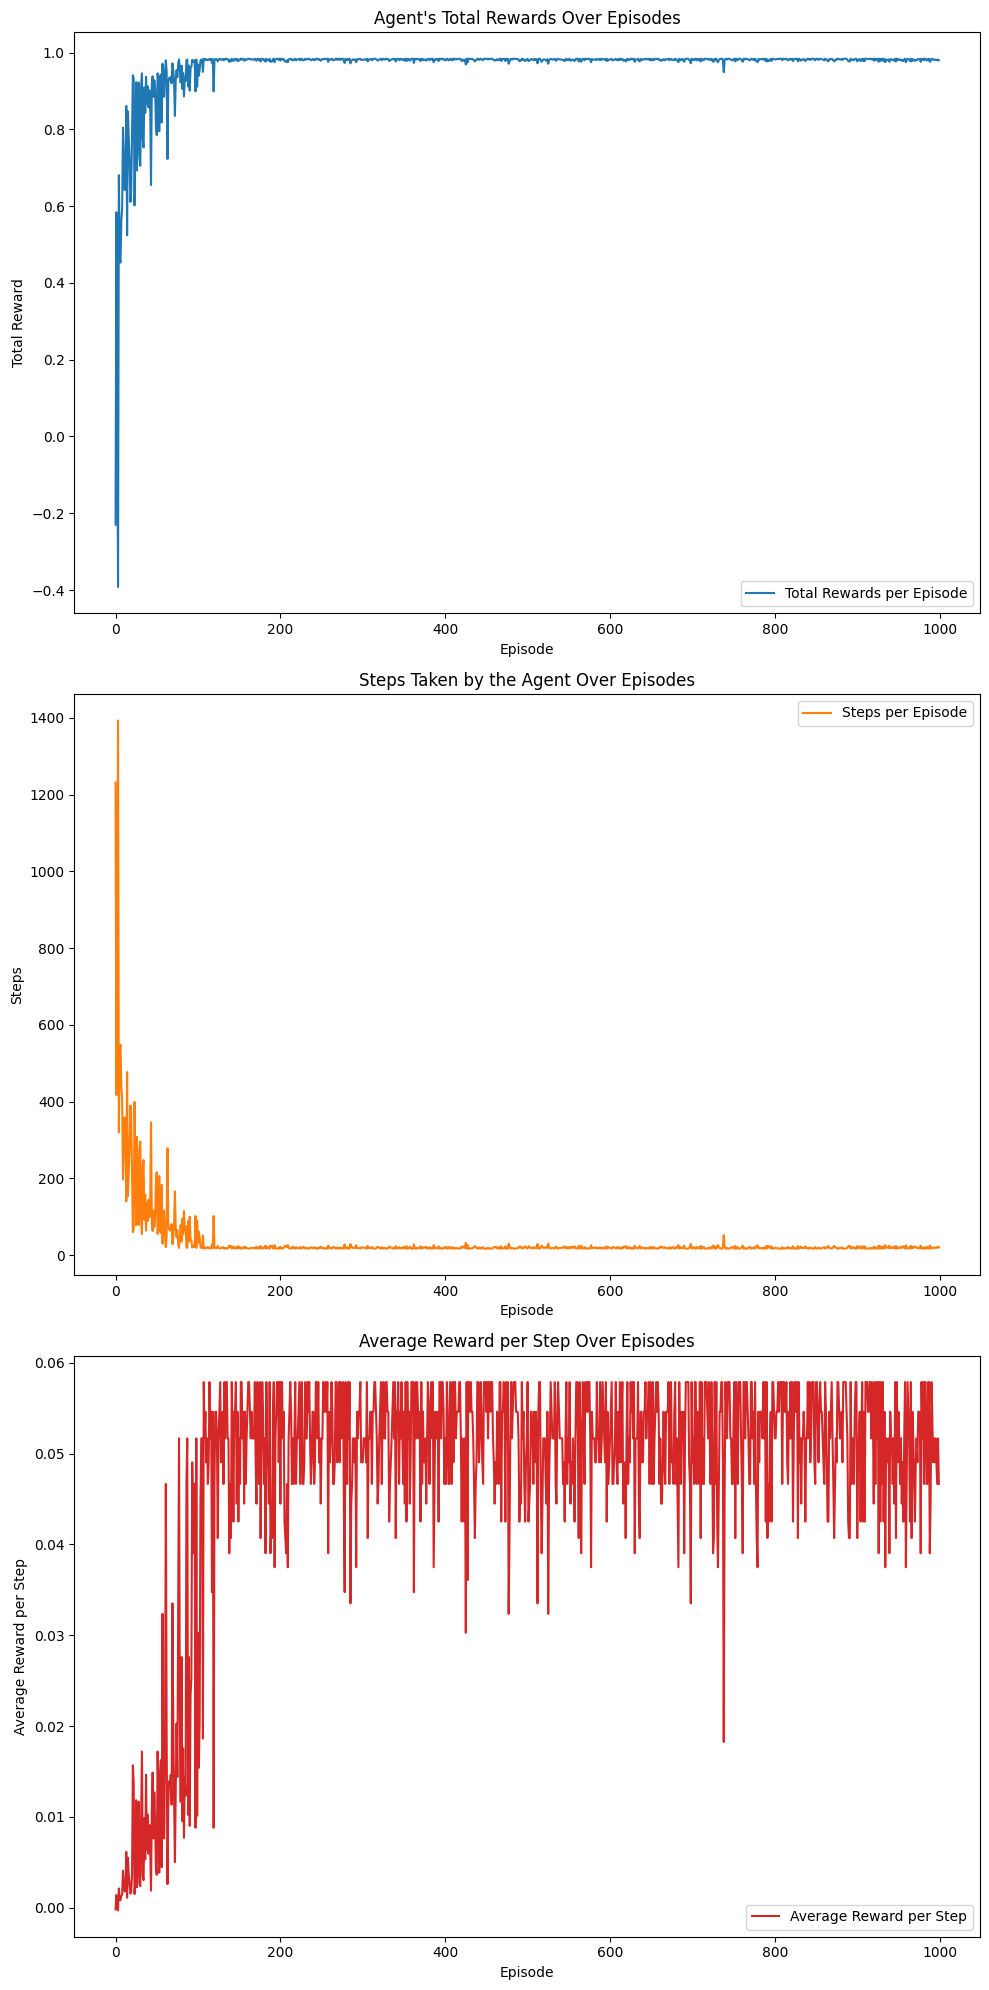

Overall success rate: 1.00
Average ΔQ per step: 0.0700


In [9]:
ACTION_MAPPING = {0: "N", 1: "E", 2: "S", 3: "W"}

class QLearning_Agent:
    def __init__(self, action_space_size, state_space_shape, alpha=0.1, gamma=0.99, epsilon=0.1):
        self.q_table = np.zeros(state_space_shape + (action_space_size,))
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.action_space_size = action_space_size

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            action = np.random.randint(0, self.action_space_size)
        else:
            action = np.argmax(self.q_table[state])
        return action

    def learn(self, state, action, reward, next_state):
        predict = self.q_table[state + (action,)]
        target = reward + self.gamma * np.max(self.q_table[next_state])
        self.q_table[state + (action,)] += self.alpha * (target - predict)

def run_episode(agent, env, episode):
    state = env.reset()
    state = (int(state[0]), int(state[1]))
    action = agent.choose_action(state)
    total_reward = 0
    steps = 0
    success = False
    delta_q = 0
    visitation_counts = np.zeros((10, 10))  # Local count for this episode

    while True:
        visitation_counts[state] += 1  # Increment visitation count for the current state
        action_dir = ACTION_MAPPING[action]
        next_state, reward, done, _ = env.step(action_dir)
        next_state = (int(next_state[0]), int(next_state[1]))
        next_action = agent.choose_action(next_state)
        
        # Capture the change in Q-value for convergence check
        q_value_before = agent.q_table[state + (action,)]
        agent.learn(state, action, reward, next_state)
        q_value_after = agent.q_table[state + (action,)]
        delta_q += np.abs(q_value_after - q_value_before)

        state = next_state
        action = next_action
        total_reward += reward
        steps += 1

        if done:
            success = (reward == 1)  
            print(f"Episode {episode} finished after {steps} steps with total reward = {total_reward}.")
            break

    return total_reward, steps, success, delta_q, visitation_counts

def simulate():
    env = maze_env.MazeEnvRandom10x10Plus(enable_render=False)
    agent = QLearning_Agent(action_space_size=env.action_space.n, state_space_shape=(10, 10))
    
    NUM_EPISODES = 1000
    total_rewards = []
    steps_per_episode = []
    successes = []
    delta_qs = []
    visitation_counts_all = np.zeros((10, 10))

    for episode in range(NUM_EPISODES):
        total_reward, steps, success, delta_q, visitation_counts = run_episode(agent, env, episode)
        total_rewards.append(total_reward)
        steps_per_episode.append(steps)
        successes.append(success)
        delta_qs.append(delta_q)
        visitation_counts_all += visitation_counts

    success_rate = np.mean(successes)
    average_reward_per_step = [r / s if s != 0 else 0 for r, s in zip(total_rewards, steps_per_episode)]
    average_delta_q = np.mean(delta_qs)

    # Plotting the results
    fig, axs = plt.subplots(3, 1, figsize=(10, 20))

    axs[0].plot(total_rewards, label='Total Rewards per Episode')
    axs[0].set_xlabel('Episode')
    axs[0].set_ylabel('Total Reward')
    axs[0].set_title('Agent\'s Total Rewards Over Episodes')
    axs[0].legend()

    axs[1].plot(steps_per_episode, label='Steps per Episode', color='tab:orange')
    axs[1].set_xlabel('Episode')
    axs[1].set_ylabel('Steps')
    axs[1].set_title('Steps Taken by the Agent Over Episodes')
    axs[1].legend()

    axs[2].plot(average_reward_per_step, label='Average Reward per Step', color='tab:red')
    axs[2].set_xlabel('Episode')
    axs[2].set_ylabel('Average Reward per Step')
    axs[2].set_title('Average Reward per Step Over Episodes')
    axs[2].legend()

    plt.tight_layout()
    plt.show()

    print(f"Overall success rate: {success_rate:.2f}")
    print(f"Average ΔQ per step: {average_delta_q:.4f}")

if __name__ == "__main__":
    simulate()

-	**Agent's Total Rewards Over Episodes:** The agent's total reward per episode shows an initial phase of learning, after which it stabilizes. This indicates that the agent quickly adapts to the environment and maintains a consistent strategy for maximizing its total rewards.
-	**Steps Taken by the Agent Over Episodes:** There is a marked decrease in the steps the agent takes over time, demonstrating a learning curve where the agent finds more efficient paths through the maze.
-	**Average Reward per Step Over Episodes:** The average reward per step starts at lower values and increases, then stabilizes with some noise in the system. This suggests that while the agent is learning to navigate the maze more efficiently, there is still variability in its performance, potentially due to the complexity introduced by portals and loops in the environment.


## Baseline Dyna

Episode 0 finished after 302 steps with total reward = 0.6989999999999998.
Episode 1 finished after 359 steps with total reward = 0.6419999999999997.
Episode 2 finished after 627 steps with total reward = 0.37399999999999956.
Episode 3 finished after 16 steps with total reward = 0.985.
Episode 4 finished after 18 steps with total reward = 0.983.
Episode 5 finished after 16 steps with total reward = 0.985.
Episode 6 finished after 18 steps with total reward = 0.983.
Episode 7 finished after 14 steps with total reward = 0.987.
Episode 8 finished after 14 steps with total reward = 0.987.
Episode 9 finished after 16 steps with total reward = 0.985.
Episode 10 finished after 17 steps with total reward = 0.984.
Episode 11 finished after 15 steps with total reward = 0.986.
Episode 12 finished after 18 steps with total reward = 0.983.
Episode 13 finished after 16 steps with total reward = 0.985.
Episode 14 finished after 14 steps with total reward = 0.987.
Episode 15 finished after 15 steps wi

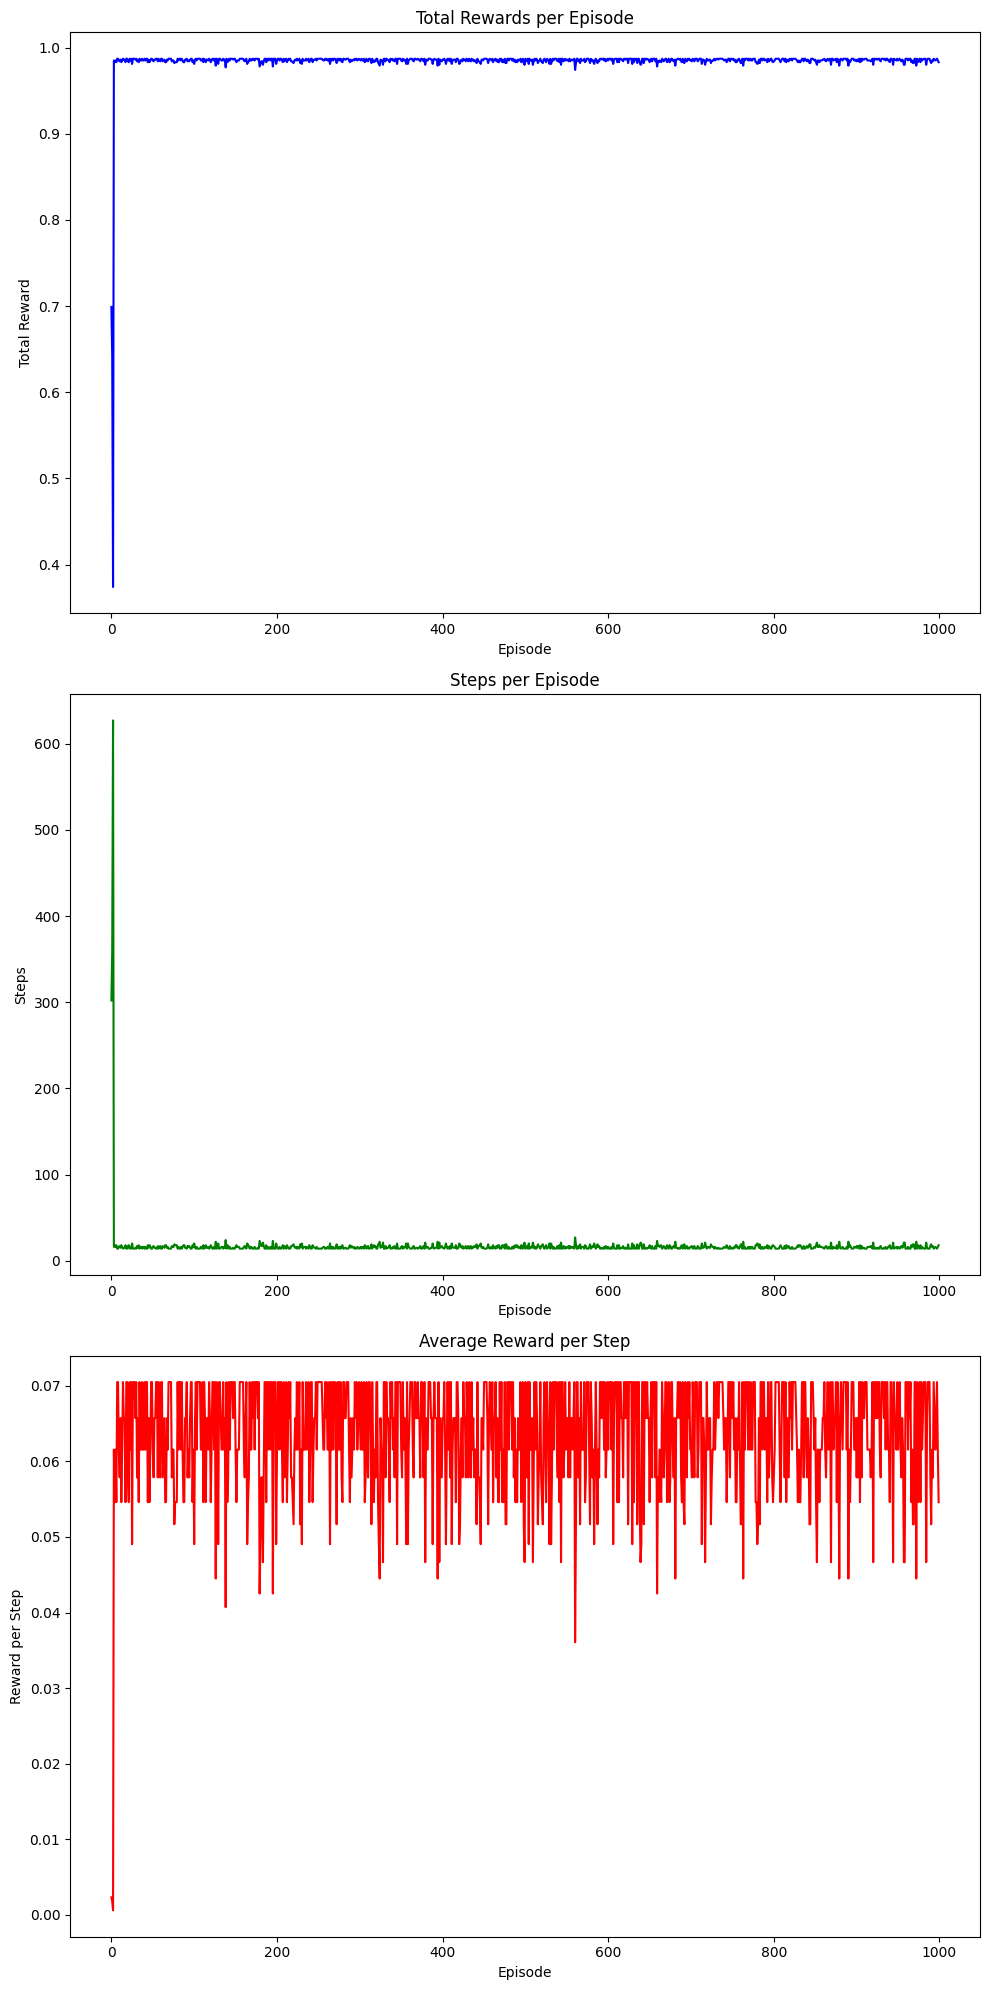

Overall success rate: 1.00


In [10]:
ACTION_MAPPING = {0: "N", 1: "E", 2: "S", 3: "W"}

class DynaQ_Agent:
    def __init__(self, action_space_size, state_space_shape, alpha=0.1, gamma=0.95, epsilon=0.1, planning_steps=10):
        self.q_table = np.zeros(state_space_shape + (action_space_size,))
        self.model = {}  # Simple model for simulating experiences
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.action_space_size = action_space_size
        self.planning_steps = planning_steps  # Number of planning steps per real step

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.action_space_size)
        return np.argmax(self.q_table[state])

    def learn(self, state, action, reward, next_state):
        # Direct learning from real experience
        predict = self.q_table[state + (action,)]
        target = reward + self.gamma * np.max(self.q_table[next_state])
        self.q_table[state + (action,)] += self.alpha * (target - predict)
        # Update the model
        self.model[(state, action)] = (reward, next_state)

    def planning(self):
        # Learning from simulated experience
        for _ in range(self.planning_steps):
            if len(self.model) == 0:
                return
            state, action = list(self.model.keys())[np.random.randint(len(self.model))]
            reward, next_state = self.model[(state, action)]
            self.learn(state, action, reward, next_state)

def run_episode(agent, env, num_episodes):
    total_rewards = []
    steps_per_episode = []
    successes = []

    for episode in range(num_episodes):
        state = env.reset()
        state = (int(state[0]), int(state[1]))
        total_reward = 0
        steps = 0
        success = False

        while True:
            action = agent.choose_action(state)
            next_state, reward, done, _ = env.step(ACTION_MAPPING[action])
            next_state = (int(next_state[0]), int(next_state[1]))

            agent.learn(state, action, reward, next_state)
            agent.planning()  
            
            state = next_state
            total_reward += reward
            steps += 1

            if done:
                success = (reward == 1)  
                successes.append(success)
                break
        
        total_rewards.append(total_reward)
        steps_per_episode.append(steps)
        print(f"Episode {episode} finished after {steps} steps with total reward = {total_reward}.")

    return total_rewards, steps_per_episode, successes

def simulate():
    env = maze_env.MazeEnvRandom10x10Plus(enable_render=False)  
    agent = DynaQ_Agent(env.action_space.n, (10, 10), alpha=0.1, gamma=0.95, epsilon=0.1, planning_steps=10)
    
    num_episodes = 1000 
    total_rewards, steps_per_episode, successes = run_episode(agent, env, num_episodes)
    success_rate = np.mean(successes)
    average_reward_per_step = [r / s if s > 0 else 0 for r, s in zip(total_rewards, steps_per_episode)]

    plt.figure(figsize=(10, 20))  
    plt.subplot(3, 1, 1)
    plt.plot(total_rewards, color='blue')
    plt.title('Total Rewards per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')

    plt.subplot(3, 1, 2)
    plt.plot(steps_per_episode, color='green')
    plt.title('Steps per Episode')
    plt.xlabel('Episode')
    plt.ylabel('Steps')

    plt.subplot(3, 1, 3)
    plt.plot(average_reward_per_step, color='red')
    plt.title('Average Reward per Step')
    plt.xlabel('Episode')
    plt.ylabel('Reward per Step')

    plt.tight_layout()
    plt.show()
    print(f"Overall success rate: {success_rate:.2f}")

if __name__ == "__main__":
    simulate()

-	**Agent's Total Rewards Over Episodes:** The Dyna-Q agent manages to stabilize its total rewards across episodes. This implies that despite the environmental complexities like portals and loops, the agent develops a strategy that consistently yields positive outcomes.
-	**Steps Taken by the Agent Over Episodes:** There is a marked reduction in the number of steps taken by the agent as episodes progress. This indicates that the Dyna-Q agent is not only learning the environment but is also efficiently using the portals and navigating the loops to reach the goal quicker.
-	**Average Reward per Step Over Episodes:** The average reward per step shows a rising trend initially, which levels off, albeit with some fluctuations. This suggests that while the agent becomes more skilled in manoeuvring through the maze, the dynamic elements like portals and loops continue to pose a challenge, reflected in the variability of the rewards per step.
